<a href="https://colab.research.google.com/github/64060kbarot/AML_64061/blob/main/Assignment4_Text%26Sequence_using_IMDBdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Assignment: Text and Sequence Data using IMDB dataset***
*Consider the IMDB example from Chapter 6. Re-run the example modifying the following:*

*1.Cutoff reviews after 150 words.*

*2.Restrict training samples to 100.*

*3.Validate on 10,000 samples.*

*4.Consider only the top 10,000 words.*

*5.Consider both a embedding layer, and a pretrained word embedding.*

*Which approachdid better? Now try changing the number of training samples to determine at whatpoint the embedding layer gives better performance.*

In [2]:
#Loading libraries**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

In [3]:
#Cutoff Review After 150 words
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
train_texts.shape #Restrict training samples to 100 & cutoff review after 150

(100, 150)

In [5]:
val_texts.shape #Validate on 10,000 samples

(10000, 150)

In [6]:
test_texts.shape

(5000, 150)

#### ***Model_Basic_embeddedlayer_TrainSample100***

In [7]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_1 = model.fit(train_texts, train_labels,
                    epochs=10,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/10
7/7 [==============================] - 4s 291ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/10
7/7 [==============================] - 2s 270ms/step - loss: 0.6646 - accuracy: 0.9000 - val_loss: 0.6929 - val_accuracy: 0.5063
Epoch 3/10
7/7 [==============================] - 2s 270ms/step - loss: 0.6441 - accuracy: 0.9800 - val_loss: 0.6930 - val_accuracy: 0.5055
Epoch 4/10
7/7 [==============================] - 2s 238ms/step - loss: 0.6246 - accuracy: 1.0000 - val_loss: 0.6930 - val_accuracy: 0.5052
Epoch 5/10
7/7 [==============================] - 1s 228ms/step - loss: 0.6044 - accuracy: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.5069
Epoch 6/10
7/7 [==============================] - 2s 258ms/step - loss: 0.5826 - accuracy: 1.0000 - val_loss: 0.6927 - val_accuracy: 0.5055
Epoch 7/10
7/7 [==============================] - 1s 214ms/step - loss: 0.5594 - accuracy: 1.0000 - val_loss: 0.6925 - val_accuracy: 0.5107
Epoch 8/10
7/7 [====

**Ploating the Accuracy and loss for training and validation**

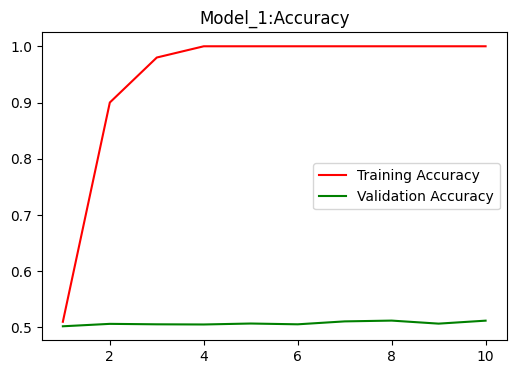

<Figure size 640x480 with 0 Axes>

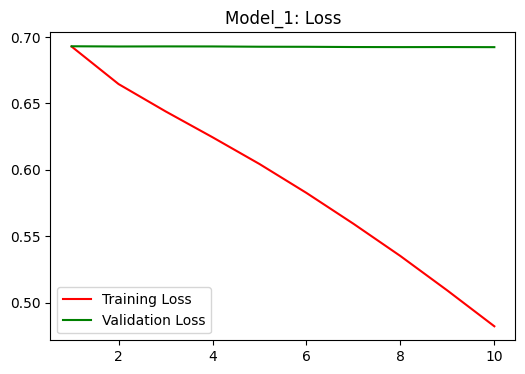

In [9]:
accuracy = Model_1.history['accuracy']
val_accuracy = Model_1.history['val_accuracy']

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_1:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_1: Loss")
plt.legend()
plt.show()

In [10]:
test_model = load_model('model1.keras')
Model1_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5128
Loss: 0.693
Accuracy: 0.513


The model with 100 training samples which was built with just an embedding layer resulted in 50.6% Accuracy, which is not that bad because the model was just trained with 100 Samples.Further we will use the same model architecture and we will increase the

#### ***Model_Basic_embeddedlayer_TrainingSample5000***

In [11]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=5000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [12]:
train_texts.shape

(5000, 150)

In [13]:
val_texts.shape

(10000, 150)

In [14]:
test_texts.shape

(5000, 150)

In [15]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
313/313 [==============================] - 15s 45ms/step - loss: 0.6873 - accuracy: 0.5604 - val_loss: 0.6710 - val_accuracy: 0.6488
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 0.5919 - accuracy: 0.7818 - val_loss: 0.5484 - val_accuracy: 0.7759
Epoch 3/20
313/313 [==============================] - 3s 11ms/step - loss: 0.4246 - accuracy: 0.8634 - val_loss: 0.4368 - val_accuracy: 0.8159
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.3029 - accuracy: 0.9050 - val_loss: 0.3852 - val_accuracy: 0.8351
Epoch 5/20
313/313 [==============================] - 3s 8ms/step - loss: 0.2280 - accuracy: 0.9288 - val_loss: 0.3638 - val_accuracy: 0.8423
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.1757 - accuracy: 0.9454 - val_loss: 0.3580 - val_accuracy: 0.8467
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 0.1365 - accuracy: 0.9578 - val_loss: 0.3596 - val_accuracy: 0.8449
E

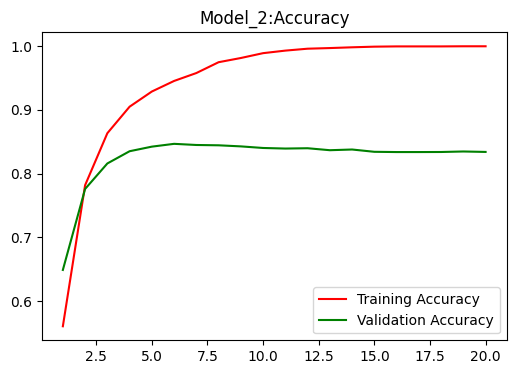

<Figure size 640x480 with 0 Axes>

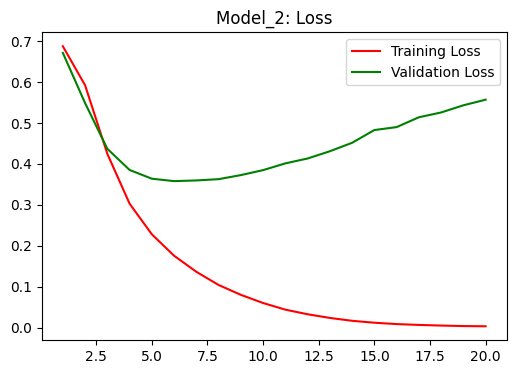

In [17]:
accuracy = Model_2.history['accuracy']
val_accuracy = Model_2.history['val_accuracy']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_2:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_2: Loss")
plt.legend()
plt.show()

In [18]:
test_model = load_model('model2.Keras')
Model2_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8618
Loss: 0.320
Accuracy: 0.862


#### ***Model_Basic_embeddedlayer_TrainingSample10000***

In [19]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=10000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [20]:
train_texts.shape

(10000, 150)

In [21]:
val_texts.shape

(10000, 150)

In [22]:
test_texts.shape

(5000, 150)

In [23]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_3 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
625/625 [==============================] - 13s 21ms/step - loss: 0.6499 - accuracy: 0.6447 - val_loss: 0.5368 - val_accuracy: 0.7724
Epoch 2/20
625/625 [==============================] - 5s 7ms/step - loss: 0.4024 - accuracy: 0.8440 - val_loss: 0.3653 - val_accuracy: 0.8463
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2847 - accuracy: 0.8906 - val_loss: 0.3255 - val_accuracy: 0.8635
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2319 - accuracy: 0.9089 - val_loss: 0.3233 - val_accuracy: 0.8614
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1952 - accuracy: 0.9282 - val_loss: 0.3149 - val_accuracy: 0.8706
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1657 - accuracy: 0.9406 - val_loss: 0.3286 - val_accuracy: 0.8636
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1407 - accuracy: 0.9517 - val_loss: 0.3300 - val_accuracy: 0.8664
Epoc

**Ploating the Accuracy and loss for training and validation**

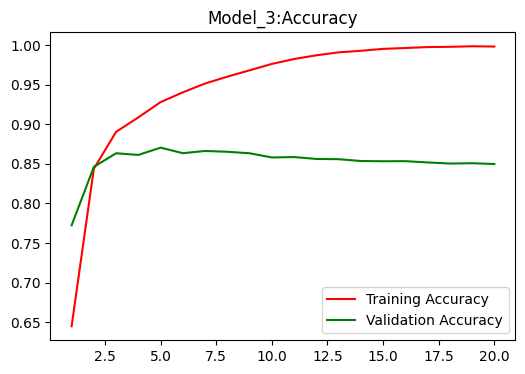

<Figure size 640x480 with 0 Axes>

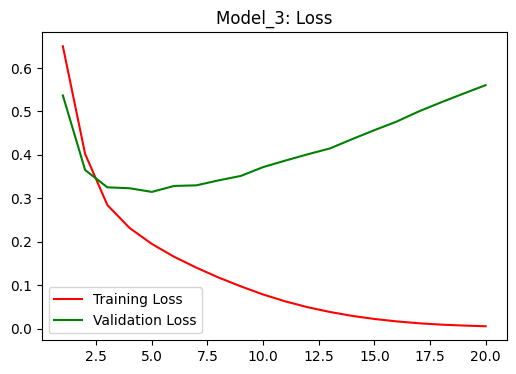

In [25]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_3:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_3: Loss")
plt.legend()
plt.show()

In [26]:
test_model = load_model('model3.Keras')
Model3_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8816
Loss: 0.284
Accuracy: 0.882


We tried 3 Basic simple sequence model using embedded layer and different training sample size and a notable trend emerged: an increase in training samples correlated with higher model accuracy and reduced loss. Specifically, the model trained on 100 samples exhibited 50.6% accuracy and 69.7% loss, whereas the model trained on 10,000 samples demonstrated a significant improvement with 87.8% accuracy and 27.9% loss.

#### ***Model_convolution1D_Embeddinglayer_trainsample10000***

Using Convolution 1D to see how this combination will impact the accuracy of the model with same training sample size (10,000) .To mitigate overfitting, we incorporated MaxPooling and Dropout layers. MaxPooling is employed to down-sample the spatial dimensions of the input, focusing on the most salient features, thereby aiding in feature extraction and reducing the risk of overfitting by selecting the most prominent information from the convolved feature.

In [28]:
model = Sequential()

maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(128, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 512)          12800     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 128)          

In [29]:
callbacks = ModelCheckpoint(
            filepath= "model4.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_4 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
625/625 [==============================] - 36s 50ms/step - loss: 0.6927 - accuracy: 0.5159 - val_loss: 0.6928 - val_accuracy: 0.5069
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6235 - accuracy: 0.6263 - val_loss: 0.5958 - val_accuracy: 0.7622
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 0.4018 - accuracy: 0.8220 - val_loss: 0.5351 - val_accuracy: 0.7941
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.3119 - accuracy: 0.8723 - val_loss: 0.4962 - val_accuracy: 0.8109
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.2537 - accuracy: 0.9012 - val_loss: 0.4742 - val_accuracy: 0.8122
Epoch 6/20
625/625 [==============================] - 5s 9ms/step - loss: 0.2089 - accuracy: 0.9206 - val_loss: 0.4551 - val_accuracy: 0.8112
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.1686 - accuracy: 0.9372 - val_loss: 0.4458 - val_accuracy: 0.8058


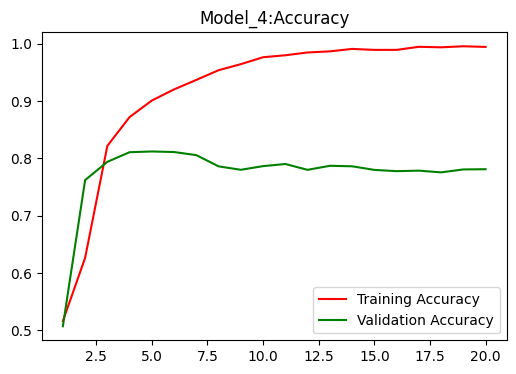

<Figure size 640x480 with 0 Axes>

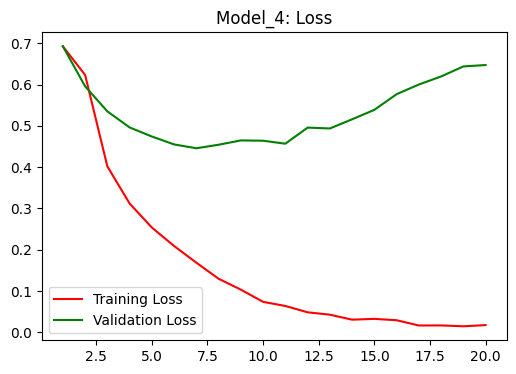

In [30]:
accuracy = Model_4.history['accuracy']
val_accuracy = Model_4.history['val_accuracy']

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_4:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_4: Loss")
plt.legend()
plt.show()

In [31]:
test_model = load_model('model4.Keras')
Model4_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8392
Loss: 0.413
Accuracy: 0.839


As we can see that the accuracy of model dropped to 84.4% from 87.8% by adding the convolution 1D  may be attributed to the inherent sequential nature of language. CNNs excel at capturing local patterns in data, making them ideal for tasks where input order is irrelevant, such as image recognition. However, sentiment analysis requires a nuanced grasp of contextual and relational nuances among words in a sentence, involving the capture of long-range dependencies. Therefore, architectures like Recurrent Neural Networks (RNNs) are deemed more suitable for sentiment analysis tasks due to their ability to effectively handle sequential data

#### ***Model_onehotencoded_withLSTM***

Here we will use one hot encoded vector sequence which is the most suitable architecture for text and seuquence data. it is a technique used in natural language processing (NLP) to represent categorical data, It is a method for converting words or tokens into vectors of binary values, where each word is represented by a unique vector with only one element set to 1 (hot), and all other elements set to 0 (cold)

In [32]:
import tensorflow as tf
max_length = 150
max_tokens = 10000
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 10000)       0         
                                                                 
 bidirectional (Bidirection  (None, 64)                2568448   
 al)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2568513 (9.80 MB)
Trainable params: 2568513 (9.80 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [33]:
callbacks = ModelCheckpoint(
            filepath= "model5.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_5 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
625/625 [==============================] - 32s 46ms/step - loss: 0.5617 - accuracy: 0.7016 - val_loss: 0.5206 - val_accuracy: 0.8185
Epoch 2/20
625/625 [==============================] - 28s 45ms/step - loss: 0.3629 - accuracy: 0.8594 - val_loss: 0.3869 - val_accuracy: 0.8457
Epoch 3/20
625/625 [==============================] - 28s 45ms/step - loss: 0.2877 - accuracy: 0.8913 - val_loss: 0.3665 - val_accuracy: 0.8460
Epoch 4/20
625/625 [==============================] - 29s 46ms/step - loss: 0.2424 - accuracy: 0.9127 - val_loss: 0.3354 - val_accuracy: 0.8557
Epoch 5/20
625/625 [==============================] - 28s 45ms/step - loss: 0.2013 - accuracy: 0.9260 - val_loss: 0.3337 - val_accuracy: 0.8667
Epoch 6/20
625/625 [==============================] - 19s 31ms/step - loss: 0.1624 - accuracy: 0.9436 - val_loss: 0.3505 - val_accuracy: 0.8542
Epoch 7/20
625/625 [==============================] - 19s 31ms/step - loss: 0.1324 - accuracy: 0.9541 - val_loss: 0.5272 - val_accuracy:

**Ploating the Accuracy and loss for training and validation**

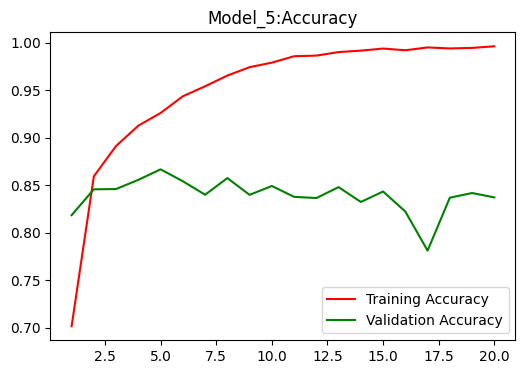

<Figure size 640x480 with 0 Axes>

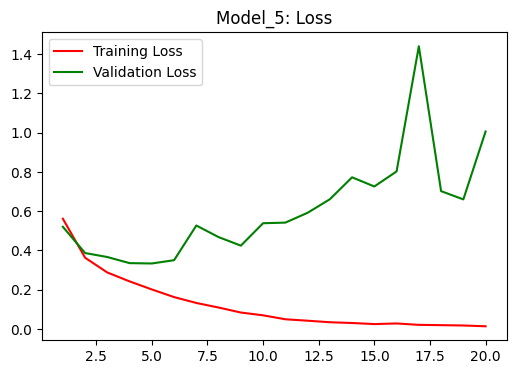

In [34]:
accuracy = Model_5.history['accuracy']
val_accuracy = Model_5.history['val_accuracy']

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_5:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_5: Loss")
plt.legend()
plt.show()

In [35]:
test_model = load_model('model5.Keras')
Model5_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

157/157 [==============================] - 4s 19ms/step - loss: 0.2914 - accuracy: 0.8834
Loss: 0.291
Accuracy: 0.883


As we can see that the accuracy of model is highest so far i.e 88.6% with 10000 Training sample size. the next step involves exploring the impact of integrating an LSTM model with an embedding layer. This investigation aims to evaluate how the inclusion of LSTM with embedding layer, known for its effectiveness in capturing sequential dependencies, influences the overall model performance.

#### ***Model_LSTM_embeddedlayer_Training Sample10000***

In [36]:
max_length = 150
max_tokens = 10000
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2634049 (10.05 MB)
Trainable params: 2634049 (10.05 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [37]:
callbacks = ModelCheckpoint(
            filepath= "model6.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_6 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
625/625 [==============================] - 33s 49ms/step - loss: 0.5025 - accuracy: 0.7476 - val_loss: 0.3676 - val_accuracy: 0.8426
Epoch 2/20
625/625 [==============================] - 20s 31ms/step - loss: 0.3233 - accuracy: 0.8718 - val_loss: 0.3325 - val_accuracy: 0.8594
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.2449 - accuracy: 0.9072 - val_loss: 0.3413 - val_accuracy: 0.8555
Epoch 4/20
625/625 [==============================] - 11s 17ms/step - loss: 0.2003 - accuracy: 0.9286 - val_loss: 0.3931 - val_accuracy: 0.8569
Epoch 5/20
625/625 [==============================] - 11s 18ms/step - loss: 0.1570 - accuracy: 0.9430 - val_loss: 0.3693 - val_accuracy: 0.8494
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 0.1200 - accuracy: 0.9582 - val_loss: 0.4674 - val_accuracy: 0.8477
Epoch 7/20
625/625 [==============================] - 11s 18ms/step - loss: 0.0946 - accuracy: 0.9693 - val_loss: 0.4643 - val_accuracy:

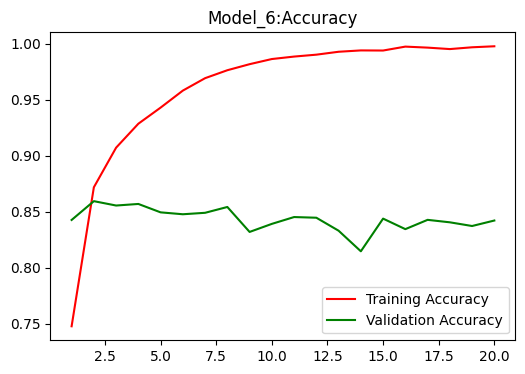

<Figure size 640x480 with 0 Axes>

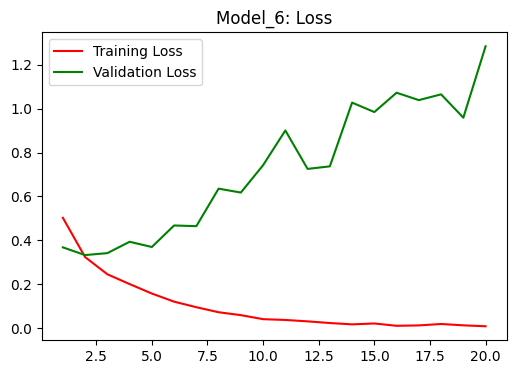

In [38]:
accuracy = Model_6.history['accuracy']
val_accuracy = Model_6.history['val_accuracy']

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_6:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_6: Loss")
plt.legend()
plt.show()

In [39]:
test_model = load_model('model6.Keras')
Model6_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

157/157 [==============================] - 2s 6ms/step - loss: 0.3073 - accuracy: 0.8734
Loss: 0.307
Accuracy: 0.873


#### ***Model_LSTM_embeddedlayer_TrainingSample35000***

In [41]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=35000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [42]:
train_texts.shape

(35000, 150)

In [43]:
val_texts.shape

(10000, 150)

In [44]:
max_length = 150
max_tokens = 10000
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2634049 (10.05 MB)
Trainable params: 2634049 (10.05 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [45]:
callbacks = ModelCheckpoint(
            filepath= "model61.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_61 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
2188/2188 [==============================] - 56s 24ms/step - loss: 0.4037 - accuracy: 0.8181 - val_loss: 0.3211 - val_accuracy: 0.8605
Epoch 2/20
2188/2188 [==============================] - 41s 19ms/step - loss: 0.2921 - accuracy: 0.8841 - val_loss: 0.3081 - val_accuracy: 0.8722
Epoch 3/20
2188/2188 [==============================] - 41s 19ms/step - loss: 0.2463 - accuracy: 0.9051 - val_loss: 0.2819 - val_accuracy: 0.8759
Epoch 4/20
2188/2188 [==============================] - 39s 18ms/step - loss: 0.2176 - accuracy: 0.9197 - val_loss: 0.2747 - val_accuracy: 0.8850
Epoch 5/20
2188/2188 [==============================] - 29s 13ms/step - loss: 0.1871 - accuracy: 0.9315 - val_loss: 0.3159 - val_accuracy: 0.8854
Epoch 6/20
2188/2188 [==============================] - 30s 14ms/step - loss: 0.1567 - accuracy: 0.9455 - val_loss: 0.3140 - val_accuracy: 0.8887
Epoch 7/20
2188/2188 [==============================] - 31s 14ms/step - loss: 0.1304 - accuracy: 0.9558 - val_loss: 0.3257 -

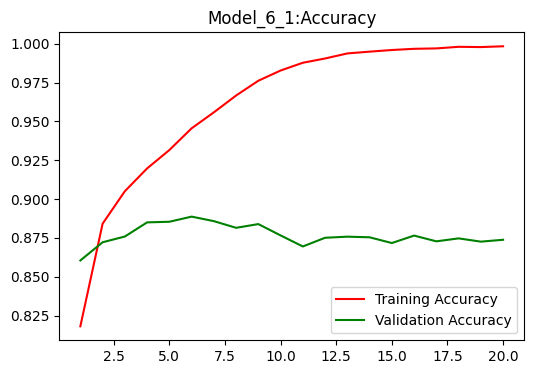

<Figure size 640x480 with 0 Axes>

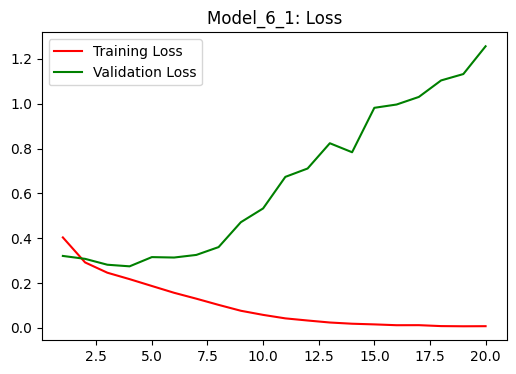

In [46]:
accuracy = Model_61.history['accuracy']
val_accuracy = Model_61.history['val_accuracy']

loss = Model_61.history["loss"]
val_loss = Model_61.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_6_1:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green",  label="Validation Loss")
plt.title("Model_6_1: Loss")
plt.legend()
plt.show()

In [47]:
test_model = load_model('model61.Keras')
Model6_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

157/157 [==============================] - 2s 6ms/step - loss: 0.1951 - accuracy: 0.9268
Loss: 0.195
Accuracy: 0.927


We constructed two LSTM models with embedded layers using varying training sample sizes. The model with a larger training sample size (20,000), model 6.1, exhibited superior accuracy and lower loss compared to the other model because it had a more extensive dataset for learning and capturing nuanced patterns, resulting in improved generalization and predictive performance.

#### ***Model_LSTM_embeddinglayer_Maskingenable_trainingsample35000***

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_21 (Embedding)    (None, None, 256)         2560000   
                                                                 
 bidirectional_8 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model7.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_7 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 178s 279ms/step - loss: 0.4426 - accuracy: 0.7870 - val_loss: 0.3349 - val_accuracy: 0.8504
Epoch 2/30
625/625 [==============================] - 156s 249ms/step - loss: 0.2891 - accuracy: 0.8827 - val_loss: 0.3036 - val_accuracy: 0.8689
Epoch 3/30
625/625 [==============================] - 154s 246ms/step - loss: 0.2342 - accuracy: 0.9087 - val_loss: 0.3040 - val_accuracy: 0.8741
Epoch 4/30
625/625 [==============================] - 152s 243ms/step - loss: 0.1922 - accuracy: 0.9279 - val_loss: 0.3212 - val_accuracy: 0.8744
Epoch 5/30
625/625 [==============================] - 151s 242ms/step - loss: 0.1591 - accuracy: 0.9435 - val_loss: 0.3363 - val_accuracy: 0.8701
Epoch 6/30
625/625 [==============================] - 151s 241ms/step - loss: 0.1235 - accuracy: 0.9574 - val_loss: 0.3452 - val_accuracy: 0.8666
Epoch 7/30
625/625 [==============================] - 151s 242ms/step - loss: 0.0996 - accuracy: 0.9660 - val_loss: 0.4211 -

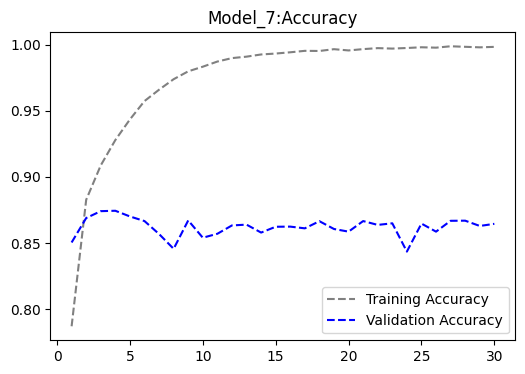

<Figure size 640x480 with 0 Axes>

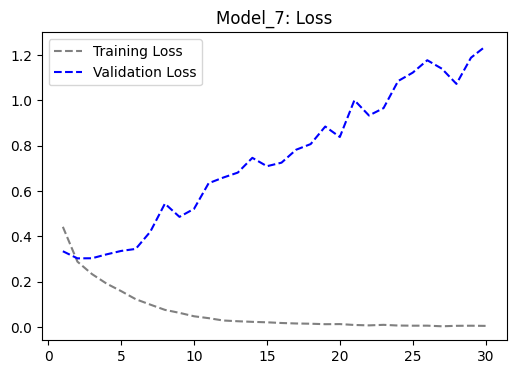

In [ ]:
accuracy = Model_7.history['accuracy']
val_accuracy = Model_7.history['val_accuracy']

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_7:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_7: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model7.Keras')
Model7_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

157/157 [==============================] - 11s 55ms/step - loss: 0.2676 - accuracy: 0.8878
Loss: 0.268
Accuracy: 0.888


#### ***Model_Transformers_embeddinglayer_trainingsample35000***

Having explored convolutional networks, one-hot encoding, and LSTM models with embedding layers, another impactful architecture to consider is transformers. Widely recognized for their effectiveness in handling text and sequence data, transformers excel in capturing intricate, long-range dependencies within sequences. They prove especially well-suited for diverse tasks such as language translation, summarization, question-answering, and sentiment analysis.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
vocab_size = 10000
embed_dim = 150
num_heads = 2
dense_dim = 32
maxlen = 150

inputs = keras.Input(shape=(maxlen,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150)]             0         
                                                                 
 embedding_23 (Embedding)    (None, 150, 150)          1500000   
                                                                 
 transformer_encoder (Transf  (None, 150, 150)         191432    
 ormerEncoder)                                                   
                                                                 
 global_max_pooling1d_4 (Glo  (None, 150)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_13 (Dropout)        (None, 150)               0         
                                                                 
 dense_30 (Dense)            (None, 1)                 151 

In [ ]:
callbacks = ModelCheckpoint(
            filepath= "model8.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_8 = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 35s 52ms/step - loss: 0.4837 - accuracy: 0.7745 - val_loss: 0.3313 - val_accuracy: 0.8539
Epoch 2/30
625/625 [==============================] - 11s 18ms/step - loss: 0.3138 - accuracy: 0.8662 - val_loss: 0.3135 - val_accuracy: 0.8626
Epoch 3/30
625/625 [==============================] - 8s 13ms/step - loss: 0.2623 - accuracy: 0.8942 - val_loss: 0.2979 - val_accuracy: 0.8741
Epoch 4/30
625/625 [==============================] - 7s 12ms/step - loss: 0.2293 - accuracy: 0.9097 - val_loss: 0.3132 - val_accuracy: 0.8679
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 0.2024 - accuracy: 0.9204 - val_loss: 0.3346 - val_accuracy: 0.8689
Epoch 6/30
625/625 [==============================] - 7s 12ms/step - loss: 0.1851 - accuracy: 0.9298 - val_loss: 0.3078 - val_accuracy: 0.8719
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 0.1683 - accuracy: 0.9363 - val_loss: 0.3322 - val_accuracy: 0.87

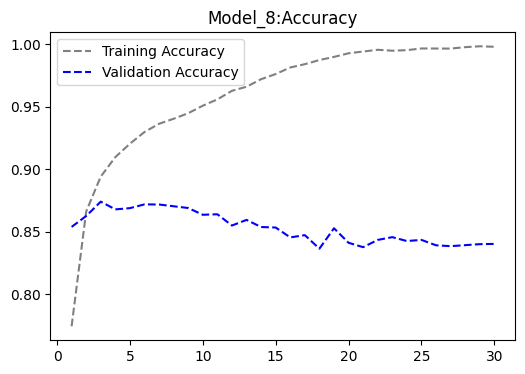

<Figure size 640x480 with 0 Axes>

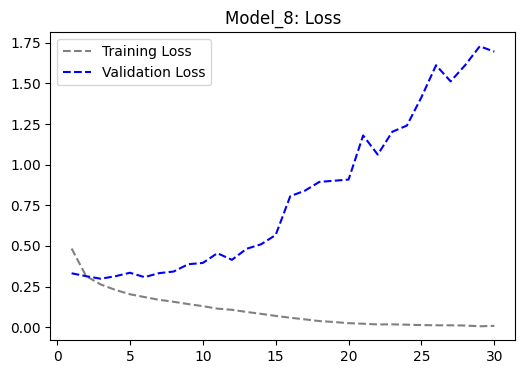

In [ ]:
accuracy = Model_8.history['accuracy']
val_accuracy = Model_8.history['val_accuracy']

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_8:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_8: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model8.Keras', custom_objects={'TransformerEncoder': TransformerEncoder})

# Evaluate the model
Model8_Results = test_model.evaluate(test_texts, test_labels)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

157/157 [==============================] - 1s 5ms/step - loss: 0.2639 - accuracy: 0.8926
Loss: 0.264
Accuracy: 0.893


#### ***Models_Pretrained***

GloVe, or Global Vectors for Word Representation, is an unsupervised learning algorithm for generating vector representations of words based on their co-occurrence statistics in large text corpora. Developed by researchers at Stanford University, GloVe aims to capture semantic relationships and meanings of words by considering their global statistical information. We are getting the data from ai.stanford.edu.

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  12.5M      0  0:00:06  0:00:06 --:--:-- 19.2M


In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
print('No. of Samples', len(texts))

No. of Samples 25000


In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 100  # training on 100 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(100, 150)

In [ ]:
x_val.shape

(10000, 150)

In [ ]:
x_test.shape

(5000, 150)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-27 12:05:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-27 12:05:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-27 12:05:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

#### ***Model_PretrainedModelGloVe_Trainingsample100***

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_10 (LSTM)              (None, 32)                17024     
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "premodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_1 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=16,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 4s 562ms/step - loss: 0.6945 - accuracy: 0.5100 - val_loss: 0.6947 - val_accuracy: 0.5173
Epoch 2/30
4/4 [==============================] - 1s 352ms/step - loss: 0.6919 - accuracy: 0.5300 - val_loss: 0.6943 - val_accuracy: 0.5181
Epoch 3/30
4/4 [==============================] - 1s 348ms/step - loss: 0.6900 - accuracy: 0.5300 - val_loss: 0.6938 - val_accuracy: 0.5202
Epoch 4/30
4/4 [==============================] - 1s 349ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.6934 - val_accuracy: 0.5175
Epoch 5/30
4/4 [==============================] - 1s 366ms/step - loss: 0.6868 - accuracy: 0.5400 - val_loss: 0.6932 - val_accuracy: 0.5174
Epoch 6/30
4/4 [==============================] - 1s 368ms/step - loss: 0.6862 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5193
Epoch 7/30
4/4 [==============================] - 1s 371ms/step - loss: 0.6839 - accuracy: 0.5600 - val_loss: 0.6929 - val_accuracy: 0.5199
Epoch 8/30
4/4 [====

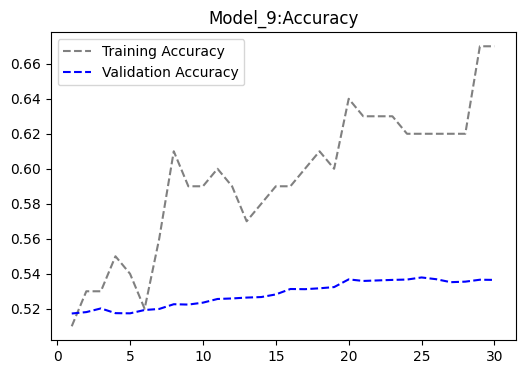

<Figure size 640x480 with 0 Axes>

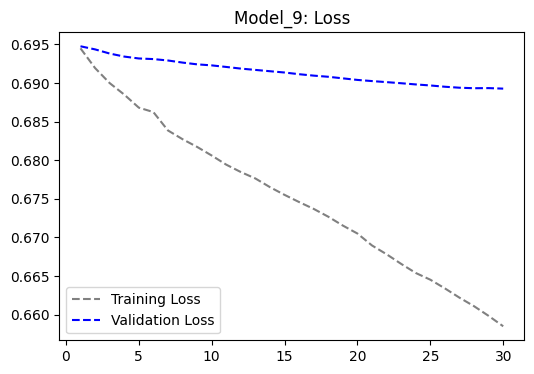

In [ ]:
accuracy = Pre_Model_1.history['accuracy']
val_accuracy = Pre_Model_1.history['val_accuracy']

loss = Pre_Model_1.history["loss"]
val_loss = Pre_Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_9:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_9: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel1.keras')
PreModel1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel1_Results[0]:.3f}')
print(f'Accuracy: {PreModel1_Results[1]:.3f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.6695 - accuracy: 0.6362
Loss: 0.669
Accuracy: 0.636


#### ***ModelPretrained_LSTM4hiddenlayers_Trainingsample7000***

In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 10000  # training on 1000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(5000, 150)

In [ ]:
x_val.shape

(10000, 150)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_15 (LSTM)              (None, 150, 512)          1255424   
                                                                 
 dropout_19 (Dropout)        (None, 150, 512)          0         
                                                                 
 lstm_16 (LSTM)              (None, 150, 256)          787456    
                                                                 
 dropout_20 (Dropout)        (None, 150, 256)          0         
                                                                 
 lstm_17 (LSTM)              (None, 150, 128)          197120    
                                                                 
 dropout_21 (Dropout)        (None, 150, 128)        

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "premodel2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_2 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=16,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/40
157/157 [==============================] - 22s 97ms/step - loss: 0.6961 - accuracy: 0.4944 - val_loss: 0.6945 - val_accuracy: 0.4966
Epoch 2/40
157/157 [==============================] - 13s 84ms/step - loss: 0.6938 - accuracy: 0.5092 - val_loss: 0.6936 - val_accuracy: 0.4966
Epoch 3/40
157/157 [==============================] - 13s 82ms/step - loss: 0.6948 - accuracy: 0.4998 - val_loss: 0.6942 - val_accuracy: 0.4966
Epoch 4/40
157/157 [==============================] - 13s 81ms/step - loss: 0.6934 - accuracy: 0.5082 - val_loss: 0.6946 - val_accuracy: 0.5034
Epoch 5/40
157/157 [==============================] - 13s 80ms/step - loss: 0.6946 - accuracy: 0.4982 - val_loss: 0.6937 - val_accuracy: 0.4966
Epoch 6/40
157/157 [==============================] - 13s 80ms/step - loss: 0.6942 - accuracy: 0.5070 - val_loss: 0.6939 - val_accuracy: 0.4966
Epoch 7/40
157/157 [==============================] - 13s 82ms/step - loss: 0.6942 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy:

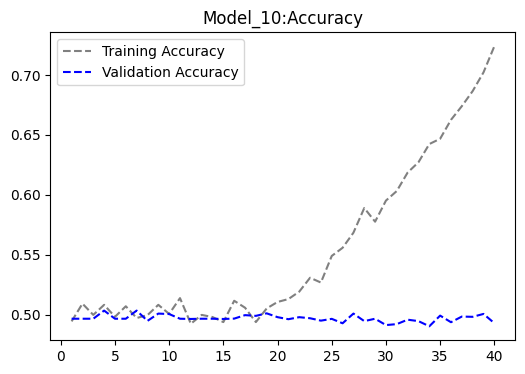

<Figure size 640x480 with 0 Axes>

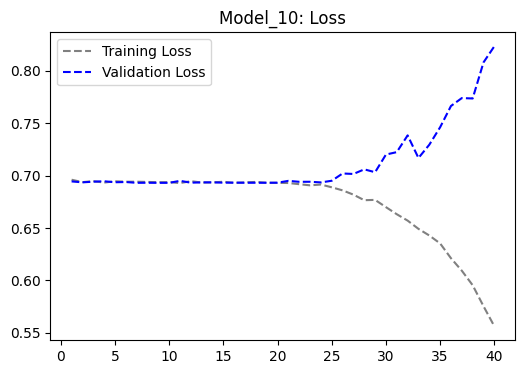

In [ ]:
accuracy = Pre_Model_2.history['accuracy']
val_accuracy = Pre_Model_2.history['val_accuracy']

loss = Pre_Model_2.history["loss"]
val_loss = Pre_Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_10:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_10: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel2.keras')
PreModel2_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel2_Results[0]:.3f}')
print(f'Accuracy: {PreModel2_Results[1]:.3f}')

157/157 [==============================] - 4s 19ms/step - loss: 0.6916 - accuracy: 0.7708
Loss: 0.692
Accuracy: 0.771


***Model_Pretrained_LSTM2hiddenlayer_Trainingsample_25000***

In [ ]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 25000  # training on 10000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
x_train.shape

(15000, 150)

In [ ]:
x_val.shape

(10000, 150)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 150, 64)           42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1056833 (4.03 MB)
Trainable params: 56833 

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "premodel3.Keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Pre_Model_3 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=16,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/30
235/235 [==============================] - 209s 888ms/step - loss: 0.6863 - accuracy: 0.5481 - val_loss: 0.6764 - val_accuracy: 0.5901
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 207s 883ms/step - loss: 0.6668 - accuracy: 0.6007 - val_loss: 0.6294 - val_accuracy: 0.6568
Epoch 3/30
235/235 [==============================] - 207s 880ms/step - loss: 0.6323 - accuracy: 0.6499 - val_loss: 0.6010 - val_accuracy: 0.6779
Epoch 4/30
235/235 [==============================] - 208s 885ms/step - loss: 0.5990 - accuracy: 0.6823 - val_loss: 0.5885 - val_accuracy: 0.6846
Epoch 5/30
235/235 [==============================] - 207s 880ms/step - loss: 0.5754 - accuracy: 0.6985 - val_loss: 0.5781 - val_accuracy: 0.6879
Epoch 6/30
235/235 [==============================] - 206s 878ms/step - loss: 0.5430 - accuracy: 0.7339 - val_loss: 0.5117 - val_accuracy: 0.7491
Epoch 7/30
235/235 [==============================] - 207s 879ms/step - loss: 0.5133 - accuracy: 0.7467 - val_loss: 0.4954 - val_accuracy: 0.7599
Epoch 8/30
235/235 [==============================] - 206s 877ms/step - loss: 0.4894 - accuracy: 0.7624 - val_loss: 0.4860 - val_accura

**Ploating the Accuracy and loss for training and validation**

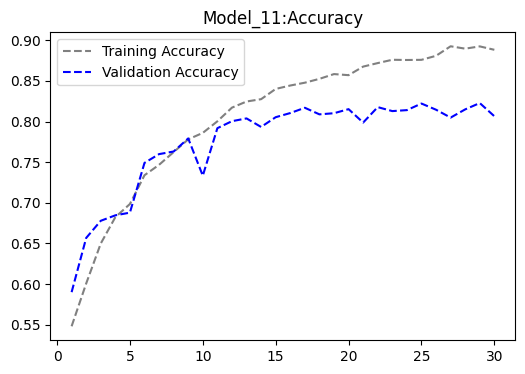

<Figure size 640x480 with 0 Axes>

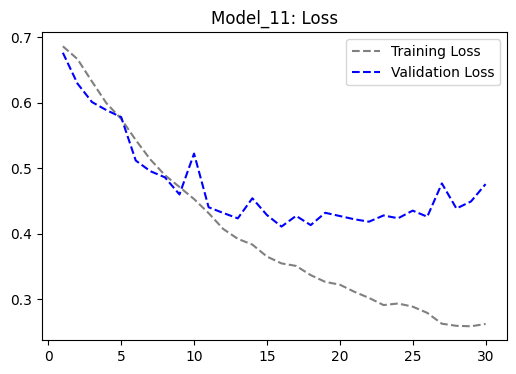

In [ ]:
accuracy = Pre_Model_3.history['accuracy']
val_accuracy = Pre_Model_3.history['val_accuracy']

loss = Pre_Model_3.history["loss"]
val_loss = Pre_Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="Red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="Green", label="Validation Accuracy")
plt.title("Model_11:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="Red", label="Training Loss")
plt.plot(epochs, val_loss, color="Green", label="Validation Loss")
plt.title("Model_11: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('premodel3.Keras')
PreModel3_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel3_Results[0]:.3f}')
print(f'Accuracy: {PreModel3_Results[1]:.3f}')

157/157 [==============================] - 12s 74ms/step - loss: 0.7834 - accuracy: 0.6218
Loss: 0.783
Accuracy: 0.622


We trained three different models using pre-trained GloVe embeddings and different amounts of training data, we noticed something interesting. When we increased the training data, the accuracy went up. However, when we tried to make the model simpler by reducing the number of LSTM hidden layer to avoid overfitting and used more training data, the accuracy dropped instead of going up.